In [1]:
#DOWNLOAD file and create DataFrame:
!wget https://data.gharchive.org/2022-03-16-0.json.gz

import json 
import pandas as pd 
from pandas.io.json import json_normalize #package for flattening json in pandas df
import gzip

data = []
# with open('2022-03-16-0.json') as f:
with gzip.open('2022-03-16-0.json.gz', 'rb') as f:
    for line in f:
        j = json.loads(line)
        data.append(j)

df = json_normalize(data)

# df = pd.read_json("2022-03-16-0.json", lines=True)


In [4]:
pd.set_option('display.max_columns', None)
df = df[["id", "created_at", "type", "actor.id", "actor.login", "public", "repo.id", "repo.name", "payload.commits"]]

df.head(10)

,id,created_at,type,actor.id,actor.login,public,repo.id,repo.name,payload.commits
0,20768407193,2022-03-16T00:00:00Z,PushEvent,6717350,mu-arch,True,368744823,mu-arch/valheimlist.org,"[{u'distinct': True, u'sha': u'08aa1ac13ac254c..."
1,20768407196,2022-03-16T00:00:00Z,PullRequestEvent,43993048,rafael1717y,True,409524917,rafael1717y/projeto_condominio,NaN
2,20768407204,2022-03-16T00:00:00Z,PushEvent,41898282,github-actions[bot],True,333669550,langgithub/auto-green,"[{u'distinct': True, u'sha': u'4deb90088171942..."
3,20768407210,2022-03-16T00:00:00Z,PushEvent,30523469,zww0019,True,420633429,zww0019/zww0019pic,"[{u'distinct': True, u'sha': u'57ab2d3a01a58e7..."
4,20768407213,2022-03-16T00:00:00Z,PushEvent,11061978,antoniogmartin,True,469776454,antoniogmartin/little-searcher,"[{u'distinct': True, u'sha': u'ea5210bd424da59..."
5,20768407221,2022-03-16T00:00:00Z,PushEvent,78374992,AlyNichols,True,453892511,dillon-1999/CharacterNetwork,"[{u'distinct': True, u'sha': u'86b07ddf1e34e96..."
6,20768407225,2022-03-16T00:00:00Z,CreateEvent,92230967,JakubGro,True,470370153,JakubGro/PGO_12c_s25458,NaN
7,20768407226,2022-03-16T00:00:00Z,IssuesEvent,54890287,nrukavkov,True,319308697,Zombie-Action/monitor,NaN
8,20768407228,2022-03-16T00:00:00Z,PushEvent,27350,kou,True,3600151,groonga/grntest,"[{u'distinct': True, u'sha': u'0a51e2ba09a0b1a..."
9,20768407232,2022-03-16T00:00:00Z,DeleteEvent,10810283,direwolf-github,True,470370059,direwolf-github/ephemeral-ci-6b83b73f,NaN


In [3]:
# columns = ['actor', 'created_at', 'id', 'org', 'payload', 'public', 'repo', 'type']
# actor_columns = ['avatar_url', 'display_login', 'gravatar_id', 'id', 'login', 'url']
# payload_columns = ['action', 'before', 'comment', 'commits', 'description', 'distinct_size', 'forkee', 'head', 'issue', 'master_branch', 'member', 'number', 'pages', 'pull_request', 'push_id', 'pusher_type', 'ref', 'ref_type', 'release', 'review', 'size']
# repo_columns = ['id', 'name', 'url']

# # pd.DataFrame.from_dict({1:df.actor[0], 2: df.actor[1]}, orient='index')
# df_actor = pd.DataFrame.from_records(df.actor).add_prefix('actor.')
# df_payload = pd.DataFrame.from_records(df.payload).add_prefix('payload.')
# df_repo = pd.DataFrame.from_records(df.repo).add_prefix('repo.')
# # df_actor.iloc[0]
# df = pd.concat([df, df_actor, df_payload, df_repo], axis=1)
# df = df.drop(['actor', 'payload', 'repo'], axis=1)
# df



PushEvent                        72432
CreateEvent                      19462
PullRequestEvent                 12393
IssueCommentEvent                 7534
DeleteEvent                       5957
WatchEvent                        5366
PullRequestReviewEvent            2958
IssuesEvent                       2447
ForkEvent                         1962
PullRequestReviewCommentEvent     1751
ReleaseEvent                      1580
CommitCommentEvent                 669
MemberEvent                        527
PublicEvent                        395
GollumEvent                        232
Name: type, dtype: int64

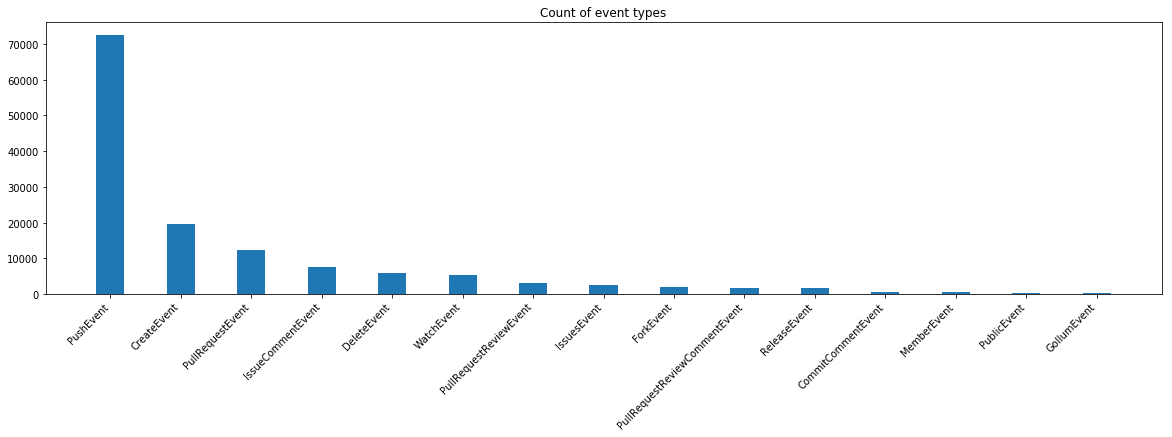

In [6]:
# !pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt
 
event_type_count = df.type.value_counts().sort_values(ascending=False)    
display(event_type_count)    
  
fig = plt.figure(figsize = (20, 5))
plt.bar(event_type_count.index, event_type_count.values, width = 0.4)
plt.xticks(rotation=45, ha='right')
plt.title("Count of event types")
plt.show()




In [8]:
# Count commits per event:

def count_commits(x):
    commits = x['payload.commits']
    if (type(x['payload.commits'])==list):
        return len(commits)
    else:
        return 0

df['commit_count'] = df.apply(lambda x: count_commits(x), axis=1)
        
df.head(5)


,id,created_at,type,actor.id,actor.login,public,repo.id,repo.name,payload.commits,commit_count
0,20768407193,2022-03-16T00:00:00Z,PushEvent,6717350,mu-arch,True,368744823,mu-arch/valheimlist.org,"[{u'distinct': True, u'sha': u'08aa1ac13ac254c...",1
1,20768407196,2022-03-16T00:00:00Z,PullRequestEvent,43993048,rafael1717y,True,409524917,rafael1717y/projeto_condominio,NaN,0
2,20768407204,2022-03-16T00:00:00Z,PushEvent,41898282,github-actions[bot],True,333669550,langgithub/auto-green,"[{u'distinct': True, u'sha': u'4deb90088171942...",1
3,20768407210,2022-03-16T00:00:00Z,PushEvent,30523469,zww0019,True,420633429,zww0019/zww0019pic,"[{u'distinct': True, u'sha': u'57ab2d3a01a58e7...",1
4,20768407213,2022-03-16T00:00:00Z,PushEvent,11061978,antoniogmartin,True,469776454,antoniogmartin/little-searcher,"[{u'distinct': True, u'sha': u'ea5210bd424da59...",1


('PushEvent count:', 72432)


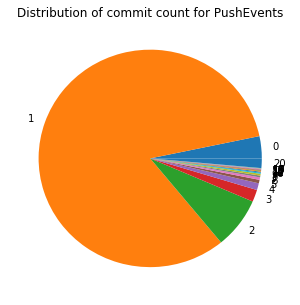

In [16]:
df_push = df[df['type']=='PushEvent']
count = df_push.groupby(by=['commit_count']).size()
count

print("PushEvent count:", len(df_push))

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize = (5, 5))
plt.pie(np.array(count.values), labels = np.array(count.index))
plt.title("Distribution of commit count for PushEvents")
plt.show() 



In [149]:
# Extract all words from commits:

import re

l = ['a', "~c@o`mm'it, ", "a", None, ', ]da\y".']
l_filtered = filter(lambda w: (w!=None and type(w)==str), l)
l_clean = map(lambda x: re.sub(r"[~`!@#$%^&*()_+-={}\[\]\\|;:',\.<>/?\"]", "", x.lower()).strip(), l_filtered)
print(l_clean)

def get_commit_words(x):
    commits = x['payload.commits']
    words = commits[0]['message'].split(' ')
    words_filtered = filter(lambda w: (w!=None and type(w)==unicode), words)
    clean_words = map(lambda x: re.sub(r"[~`!@#$%^&*()_+-={}\[\]\\|;:',\.<>/?\"]", "", x.lower()).strip(), words_filtered)
    return filter(lambda w: (w!=''), clean_words)
    
df_push_with_commits = df_push[df_push['commit_count']>0]
df_push_with_commits['commit_words'] = df_push_with_commits.apply(lambda x: get_commit_words(x), axis=1)

df_push_with_commits.head(10)
        


['a', 'commit', 'a', 'day']


/home/cristiandugacicu/.local/lib/python2.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,id,created_at,type,actor.id,actor.login,public,repo.id,repo.name,payload.commits,commit_count,commit_words
0,20768407193,2022-03-16T00:00:00Z,PushEvent,6717350,mu-arch,True,368744823,mu-arch/valheimlist.org,"[{u'distinct': True, u'sha': u'08aa1ac13ac254c...",1,"[automated, script, push]"
2,20768407204,2022-03-16T00:00:00Z,PushEvent,41898282,github-actions[bot],True,333669550,langgithub/auto-green,"[{u'distinct': True, u'sha': u'4deb90088171942...",1,"[a, commit, a, day, keeps, your, girlfriend, a..."
3,20768407210,2022-03-16T00:00:00Z,PushEvent,30523469,zww0019,True,420633429,zww0019/zww0019pic,"[{u'distinct': True, u'sha': u'57ab2d3a01a58e7...",1,"[add, pic]"
4,20768407213,2022-03-16T00:00:00Z,PushEvent,11061978,antoniogmartin,True,469776454,antoniogmartin/little-searcher,"[{u'distinct': True, u'sha': u'ea5210bd424da59...",1,"[remove, toseq, transformation, use, lists]"
5,20768407221,2022-03-16T00:00:00Z,PushEvent,78374992,AlyNichols,True,453892511,dillon-1999/CharacterNetwork,"[{u'distinct': True, u'sha': u'86b07ddf1e34e96...",2,"[added, bio, and, character, table, slots]"
8,20768407228,2022-03-16T00:00:00Z,PushEvent,27350,kou,True,3600151,groonga/grntest,"[{u'distinct': True, u'sha': u'0a51e2ba09a0b1a...",1,"[add, entry]"
10,20768407238,2022-03-16T00:00:00Z,PushEvent,69794782,WangZiYuDaNu,True,470369517,ZYDNstu/.github,"[{u'distinct': True, u'sha': u'd71ae699107780e...",1,"[create, issuetemplatemd]"
11,20768407239,2022-03-16T00:00:00Z,PushEvent,96988015,muhammedsheikhh,True,448605072,muhammedsheikhh/muhammedsheikhh.github.io,"[{u'distinct': True, u'sha': u'2d94050e358fac5...",1,"[project, updated]"
12,20768407245,2022-03-16T00:00:00Z,PushEvent,29139614,renovate[bot],True,66806307,drazisil/mcos,"[{u'distinct': False, u'sha': u'f68fba1f87162d...",2,"[repo, visualizer, updated, diagram]"
22,20768407283,2022-03-16T00:00:00Z,PushEvent,814519,eRQee,True,413236619,Dev-Op5/debian-clean-installation-wizard,"[{u'distinct': True, u'sha': u'2e85cf738a53503...",1,"[added, npms, cool, serveradministratives, pac..."


In [192]:
import numpy as np    

def flat_map(list_of_lists):
    flat_list = []
    for sublist in list_of_lists:
        for item in sublist:
            flat_list.append(item)
    return flat_list

words = list(df_push_with_commits['commit_words'])
words = flat_map(words)
words
        

    
import collections

counter=collections.Counter(words)

print("Total unique words count:", len(counter))
print()
print("Most common words in commits:")
df_most_common_words = pd.DataFrame(counter.most_common(20), columns=["word", "count"])
df_most_common_words

('Total unique words count:', 39375)
()
Most common words in commits:


,word,count
0,update,17056
1,to,12146
2,add,6097
3,github,6039
4,the,5251
5,deploy,4923
6,pages,4707
7,skip,4196
8,in,4025
9,updated,4006


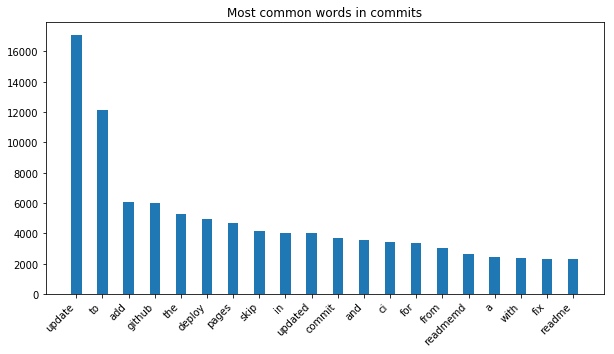

In [193]:
# df_most_common_words = pd.DataFrame.from_dict(most_common_words, orient='index')
# display(df_most_common_words['count'])

fig = plt.figure(figsize = (10, 5))
plt.bar(df_most_common_words.word, df_most_common_words['count'], width = 0.4)
plt.xticks(rotation=45, ha='right')
plt.title("Most common words in commits")
plt.show()

